In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/bangla-ai-64pix/x_train_banglaHW_64pix.pickle
/kaggle/input/bangla-ai-64pix/y_train_consonant_banglaHW_64pix.pickle
/kaggle/input/bangla-ai-64pix/y_train_vowel_banglaHW_64pix.pickle
/kaggle/input/bangla-ai-64pix/y_test_consonant_banglaHW_64pix.pickle
/kaggle/input/bangla-ai-64pix/y_test_vowel_banglaHW_64pix.pickle
/kaggle/input/bangla-ai-64pix/x_test_banglaHW_64pix.pickle
/kaggle/input/bangla-ai-64pix/y_train_root_banglaHW_64pix.pickle
/kaggle/input/bangla-ai-64pix/y_test_root_banglaHW_64ix.pickle
/kaggle/input/balanced-32-bengali-dataset/x_test_32_vowel_banglaHW_list_oversampled.pickle
/kaggle/input/balanced-32-bengali-dataset/x_train_32_vowel_banglaHW_list_oversampled.pickle
/kaggle/input/balanced-32-bengali-dataset/y_test_32_vowel_banglaHW_list_oversampled.pickle
/kaggle/input/balanced-32-bengali-dataset/x_train_32_root_banglaHW_list_oversampled.pickle
/kaggle/input/balanced-32-bengali-dataset/x_test_32_root_banglaHW_list_oversampled.pickle
/kaggle/input/balanced-32-be

In [2]:
import pyarrow.parquet as pq

import pyarrow as pa

import numpy as np

import matplotlib.pyplot as plt

import pandas as pd
import pickle

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split



import tensorflow as tf
from keras.models import Model

from keras.layers import MaxPooling2D
from keras.optimizers import SGD
from keras.models import clone_model
from keras.utils import to_categorical
from keras.layers.core import Activation
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization, Input
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
import gc
import keras

from keras import backend as K

import cv2



Using TensorFlow backend.


In [3]:
pickle_in = open("/kaggle/input/bangla-ai-64pix/x_train_banglaHW_64pix.pickle", "rb")
xTrainData = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open("/kaggle/input/bangla-ai-64pix/x_test_banglaHW_64pix.pickle", "rb")
xTestData = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open("/kaggle/input/bangla-ai-64pix/y_train_root_banglaHW_64pix.pickle", "rb")
yTrainData = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open("/kaggle/input/bangla-ai-64pix/y_test_root_banglaHW_64ix.pickle", "rb")
yTestData = pickle.load(pickle_in)
pickle_in.close()

'''pickle_in = open("/kaggle/input/bangla-ai-dataset-new/x_validation_banglaHW_list.pickle", "rb")
xTestData = pickle.load(pickle_in) 
pickle_in.close()

pickle_in = open("/kaggle/input/bangla-ai-dataset-new/y_root_train_banglaHW_list.pickle", "rb")
yTrainRootData = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open("/kaggle/input/bangla-ai-dataset-new/y_root_validation_banglaHW_list.pickle", "rb")
yTestRootData = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open("/kaggle/input/bangla-ai-dataset-new/y_vowel_train_banglaHW_list.pickle", "rb")
yTrainVowelData = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open("/kaggle/input/bangla-ai-dataset-new/y_vowel_validation_banglaHW_list.pickle", "rb")
yTestVowelData = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open("/kaggle/input/bangla-ai-dataset-new/y_consonant_train_banglaHW_list.pickle", "rb")
yTrainConsonantData = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open("/kaggle/input/bangla-ai-dataset-new/y_consonant_validation_banglaHW_list.pickle", "rb")
yTestConsonantData = pickle.load(pickle_in)
pickle_in.close()'''

'''pickle_in = open("/kaggle/input/bengali-ai/x_banglaHW_list.pickle", "rb")
trainX = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open("/kaggle/input/bengali-ai/y_banglaHW_list_root.pickle", "rb")
trainYRoot = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open("/kaggle/input/bengali-ai/y_banglaHW_list_vowel.pickle", "rb")
trainYVowel = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open("/kaggle/input/bengali-ai/y_banglaHW_list_consonant.pickle", "rb")
trainYConsonant = pickle.load(pickle_in)
pickle_in.close()'''

'pickle_in = open("/kaggle/input/bengali-ai/x_banglaHW_list.pickle", "rb")\ntrainX = pickle.load(pickle_in)\npickle_in.close()\n\npickle_in = open("/kaggle/input/bengali-ai/y_banglaHW_list_root.pickle", "rb")\ntrainYRoot = pickle.load(pickle_in)\npickle_in.close()\n\npickle_in = open("/kaggle/input/bengali-ai/y_banglaHW_list_vowel.pickle", "rb")\ntrainYVowel = pickle.load(pickle_in)\npickle_in.close()\n\npickle_in = open("/kaggle/input/bengali-ai/y_banglaHW_list_consonant.pickle", "rb")\ntrainYConsonant = pickle.load(pickle_in)\npickle_in.close()'

168


36

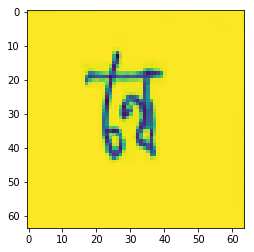

In [4]:
plt.imshow(xTrainData[1000])
plt.show
CLS = (yTrainData.shape[1])
print(CLS)
gc.collect()

In [5]:
IMG_SIZE = xTrainData.shape[1]
xTrainData = np.array(xTrainData).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
xTestData = np.array(xTestData).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print(xTrainData.shape)
print(xTestData.shape)

(190798, 64, 64, 1)
(10042, 64, 64, 1)


In [6]:
print(yTrainData.shape)
print(yTestData.shape)

(190798, 168)
(10042, 168)


In [7]:

xTrainData = xTrainData/np.float32(255.0)
xTestData = xTestData/np.float32(255.0)

In [8]:
yTrainData = np.array(yTrainData)
yTestData = np.array(yTestData)
print((xTrainData.shape))
print((xTestData.shape))
print((yTrainData.shape))
print((yTestData.shape))

(190798, 64, 64, 1)
(10042, 64, 64, 1)
(190798, 168)
(10042, 168)


In [9]:
class SmallerVGGNet:
    @staticmethod
    def build(width, height, depth, classes, finalAct="softmax"):
        # initialize the model along with the input shape to be
        # "channels last" and the channels dimension itself
        model = Sequential()
        inputShape = (height, width, depth)
        chanDim = -1

        # if we are using "channels first", update the input shape
        # and channels dimension
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1
        model.add(Conv2D(32, (3, 3), padding="same",
            input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(3, 3)))
        model.add(Dropout(0.25))
        # (CONV => RELU) * 2 => POOL
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        # (CONV => RELU) * 2 => POOL
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        
        model.add(Conv2D(256, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(256, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        
        model.add(Flatten())
        model.add(Dense(1024))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        
        model.add(Dense(512))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))

        # use a *softmax* activation for single-label classification
        # and *sigmoid* activation for multi-label classification
        model.add(Dense(classes))
        model.add(Activation(finalAct))

        # return the constructed network architecture
        return model

In [10]:
model = SmallerVGGNet.build(
    width=xTrainData.shape[2], height=xTrainData.shape[1],
    depth=xTrainData.shape[3], classes=CLS,
    finalAct="softmax")

INIT_LR = 1e-3
batch_size = 128
epochs = 50

opt = Adam(lr=INIT_LR, decay=INIT_LR / epochs)

model.compile(loss="categorical_crossentropy", optimizer=opt,
    metrics=["accuracy"])


# Set a learning rate annealer. Learning rate will be half after 3 epochs if accuracy is not increased
'''learning_rate_reduction = ReduceLROnPlateau(monitor='dense_1_accuracy', 
                                            patience=2, 
                                            verbose=1,
                                            factor=0.5, 
                                            min_lr=0.000001)'''
'''learning_rate_reduction_vowel = ReduceLROnPlateau(monitor='dense_2_accuracy', 
                                            patience=2, 
                                            verbose=1,
                                            factor=0.5, 
                                            min_lr=0.000001)
learning_rate_reduction_consonant = ReduceLROnPlateau(monitor='dense_3_accuracy', 
                                            patience=2, 
                                            verbose=1,
                                            factor=0.5, 
                                            min_lr=0.000001)'''



"learning_rate_reduction_vowel = ReduceLROnPlateau(monitor='dense_2_accuracy', \n                                            patience=2, \n                                            verbose=1,\n                                            factor=0.5, \n                                            min_lr=0.000001)\nlearning_rate_reduction_consonant = ReduceLROnPlateau(monitor='dense_3_accuracy', \n                                            patience=2, \n                                            verbose=1,\n                                            factor=0.5, \n                                            min_lr=0.000001)"

In [11]:

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


# This will just calculate parameters required to augment the given data. This won't perform any augmentations
#datagen.fit(xTrainData)

# Fit the model

#gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction = 0.25)

#sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))



In [12]:
history =  model.fit_generator(
    datagen.flow(xTrainData, yTrainData, batch_size=batch_size),
    validation_data = (xTestData, yTestData),
    steps_per_epoch=len(xTrainData) // batch_size,
    epochs=epochs, verbose=1)

Epoch 1/50
1490/1490 [==============================] - 124s 83ms/step - loss: 4.1765 - accuracy: 0.1179 - val_loss: 15.3988 - val_accuracy: 0.0049
Epoch 2/50
1490/1490 [==============================] - 118s 79ms/step - loss: 1.8133 - accuracy: 0.5105 - val_loss: 0.8921 - val_accuracy: 0.7465
Epoch 3/50
1490/1490 [==============================] - 119s 80ms/step - loss: 1.2211 - accuracy: 0.6643 - val_loss: 0.6794 - val_accuracy: 0.8101
Epoch 4/50
1490/1490 [==============================] - 120s 81ms/step - loss: 1.0071 - accuracy: 0.7223 - val_loss: 0.7012 - val_accuracy: 0.8027
Epoch 5/50
1490/1490 [==============================] - 118s 79ms/step - loss: 0.8923 - accuracy: 0.7523 - val_loss: 0.4945 - val_accuracy: 0.8605
Epoch 6/50
1490/1490 [==============================] - 117s 79ms/step - loss: 0.8112 - accuracy: 0.7741 - val_loss: 0.4774 - val_accuracy: 0.8647
Epoch 7/50
1490/1490 [==============================] - 118s 79ms/step - loss: 0.7596 - accuracy: 0.7889 - val_loss: 

In [13]:
prediction=model.predict(xTestData)
correct = 0
total = 0
for x in range(xTestData.shape[0]):
    
    guessed = np.argmax(prediction[x])

    actual = np.argmax(yTestData[x])
    if(guessed == actual):
        correct += 1
    total+=1
print(correct)
print(total)
print(correct/total)
        



9314
10042
0.927504481179048


In [14]:
model.save('model_b_hw_root.hdf5')

In [15]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
# save plot to file

plt.savefig('_plot.png')
plt.close()

In [16]:
model.save('model_root.h5')